# Train Station Calculator

This file is the work to do the task: find the fastest route to go to STATION A to STATION B in France.

Librairies used:
- pandas (read csv)
- matplotlib (graphs)
- networkx (network graphs)

## DATA

In [120]:
# unzip the project data
import zipfile

with zipfile.ZipFile("./project_data.zip", 'r') as zip_ref:
    zip_ref.extractall("project_data")

In [318]:
# load timetables
import pandas as pd
timetables_df = pd.read_csv("./project_data/timetables.csv", delimiter="\t", encoding="utf-8")

# correcting bad "trajet" names (Gare de Evreux - Normandie)
timetables_df['trajet'] = timetables_df['trajet'].str.replace('Evreux - Normandie', 'Evreux-Normandie')

# lowercase trajet
timetables_df['trajet'] = timetables_df['trajet'].str.lower()
timetables_df

,trip_id,trajet,duree
0,OCESN003100F140147152,gare de le havre - gare de paris-st-lazare,138
1,OCESN003190F040047309,gare de dieppe - gare de paris-st-lazare,145
2,OCESN003198F030037315,gare de paris-st-lazare - gare de rouen-rive-d...,97
3,OCESN003300F030037323,gare de cherbourg - gare de paris-st-lazare,194
4,OCESN003313F380387526,gare de caen - gare de paris-st-lazare,149
...,...,...,...
1570,OCESN895822F0500552575,gare de belfort-ville - gare de lyon-perrache,244
1571,OCESN895830F0200252600,gare de lons-le-saunier - gare de lyon-perrache,103
1572,OCESN895880F0500552634,gare de belfort-ville - gare de lons-le-saunier,144
1573,OCESN895940F0200252654,gare de besançon-viotte - gare de lons-le-saunier,89


In [472]:
# Splitting the 'trajet' column into 'start' and 'end' columns
timetables_df[['start', 'end']] = timetables_df['trajet'].str.split(' - ', expand=True)
timetables_df.head()

,trip_id,trajet,duree,start,end
0,OCESN003100F140147152,gare de le havre - gare de paris-st-lazare,138,gare de le havre,gare de paris-st-lazare
1,OCESN003190F040047309,gare de dieppe - gare de paris-st-lazare,145,gare de dieppe,gare de paris-st-lazare
2,OCESN003198F030037315,gare de paris-st-lazare - gare de rouen-rive-d...,97,gare de paris-st-lazare,gare de rouen-rive-droite
3,OCESN003300F030037323,gare de cherbourg - gare de paris-st-lazare,194,gare de cherbourg,gare de paris-st-lazare
4,OCESN003313F380387526,gare de caen - gare de paris-st-lazare,149,gare de caen,gare de paris-st-lazare


In [471]:
timetables_df.to_csv("./timetables_v2.csv", sep=";", encoding="utf-8")

In [320]:
# get all stations that start from a city
timetables_df[timetables_df["start"].str.contains("lyon-part-dieu-gare-rou")]

,trip_id,trajet,duree,start,end
488,OCESN039561R0200219993,lyon-part-dieu-gare-rou - saint-etienne-chtx gr,71,lyon-part-dieu-gare-rou,saint-etienne-chtx gr
491,OCESN039640R0200220010,lyon-part-dieu-gare-rou - roanne-gare-routière,115,lyon-part-dieu-gare-rou,roanne-gare-routière
523,OCESN039755R0100120083,lyon-part-dieu-gare-rou - morez lycée,195,lyon-part-dieu-gare-rou,morez lycée


In [321]:
import matplotlib.pyplot as plt
import networkx as nx

# create the network directed graph from the dataset
G = nx.from_pandas_edgelist(timetables_df,
                            source="start", 
                            target="end",
                            edge_attr='duree', # weights
                            create_using=nx.DiGraph(oriented=True, data=True))

https://networkx.org/documentation/stable/reference/drawing.html

**Circular** Layout (nx.draw_circular):
    Good for showing cyclic processes or circular relationships.
    Can be hard to interpret if there are many nodes and edges.

**Kamada-Kawai** Layout (nx.kamada_kawai_layout):
    Good for general-purpose display of graphs.
    Positions nodes in a way that reduces edge crossings and edge length.

**Spring** Layout (nx.draw_spring or nx.spring_layout):
    Good for visual clarity, as it spaces nodes evenly to reduce overlaps and crossings.
    Uses a force-directed algorithm to position nodes.

**Shell** Layout (nx.draw_shell or nx.shell_layout):
    Allows grouping of nodes into concentric circles.
    Good for showing hierarchical or grouped relationships.

**Random** Layout (nx.draw_random or nx.random_layout):
    Nodes are positioned randomly, it may not provide meaningful visualization but can be useful for certain types of analysis or datasets.

**Spectral** Layout (nx.draw_spectral or nx.spectral_layout):
    Good for showing clusters or communities of nodes.
    Uses the eigenvalues of the graph Laplacian to position nodes.

## Visualize

We can visualize our graph with the library matplotlib

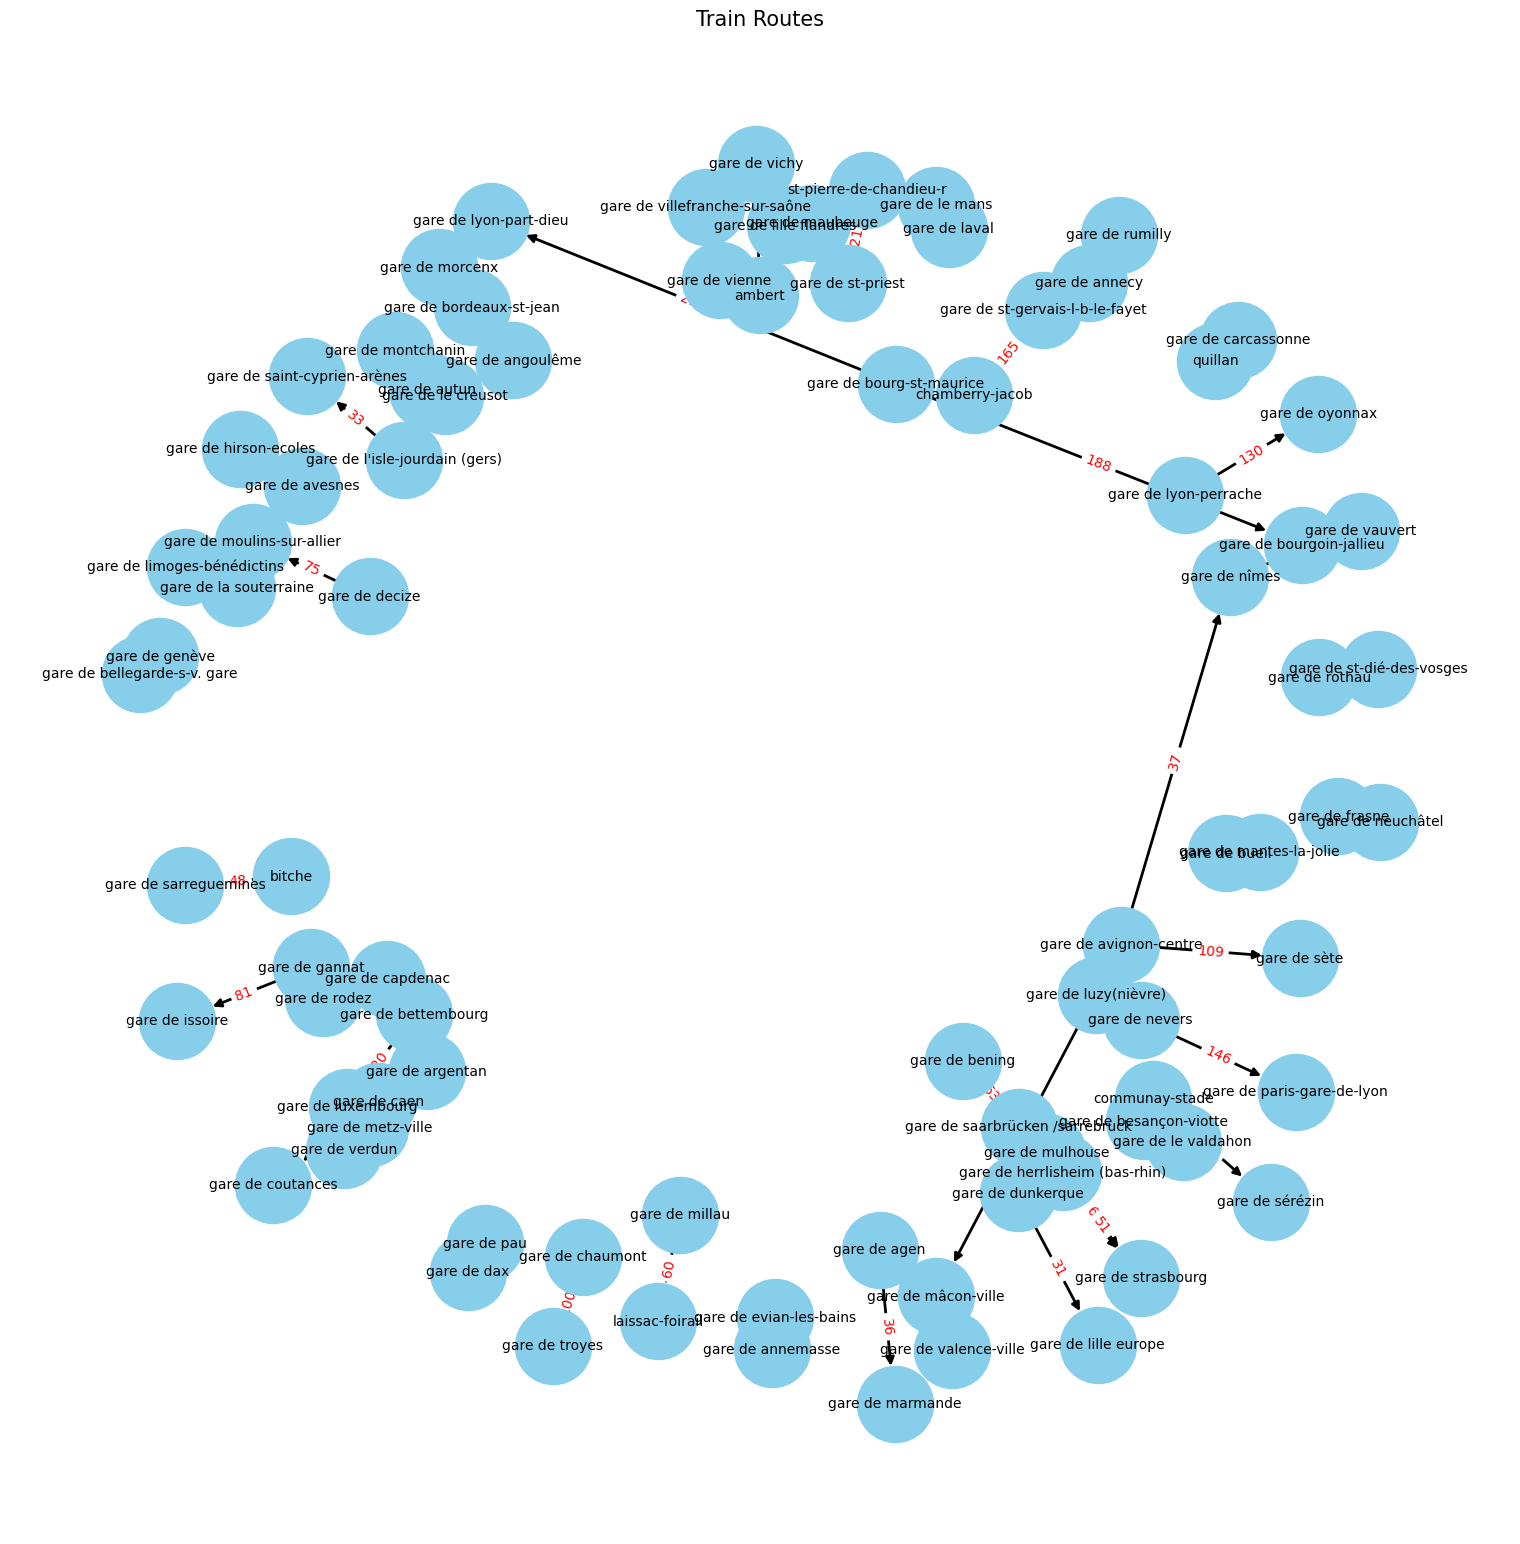

In [322]:
import matplotlib.pyplot as plt
import networkx as nx

# Get 50 Stations
df_sample = timetables_df.sample(n=50)

# Create the directed graph
G_test = nx.from_pandas_edgelist(df_sample,
                                source="start", 
                                target="end",
                                edge_attr='duree', # weights
                                create_using=nx.DiGraph(oriented=True, data=True))

# Create the graph
plt.figure(figsize=(15,15))

# Draw the nodes and edges
# best: kamada_kawai / spring
pos = nx.spring_layout(G_test)  # Get positions for all nodes
nx.draw(G_test, pos,
        with_labels=True,
        node_size=3000,
        node_color="skyblue",
        width=2,
        font_size=10,
        arrowsize=12,

        arrowstyle="-|>")

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G_test, 'duree')
nx.draw_networkx_edge_labels(G_test, pos, edge_labels=edge_labels, font_color='red')

# Display
plt.title('Train Routes', size=15)
plt.show()

## Find the shortest path

https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html

In [324]:
timetables_df.head()

,trip_id,trajet,duree,start,end
0,OCESN003100F140147152,gare de le havre - gare de paris-st-lazare,138,gare de le havre,gare de paris-st-lazare
1,OCESN003190F040047309,gare de dieppe - gare de paris-st-lazare,145,gare de dieppe,gare de paris-st-lazare
2,OCESN003198F030037315,gare de paris-st-lazare - gare de rouen-rive-d...,97,gare de paris-st-lazare,gare de rouen-rive-droite
3,OCESN003300F030037323,gare de cherbourg - gare de paris-st-lazare,194,gare de cherbourg,gare de paris-st-lazare
4,OCESN003313F380387526,gare de caen - gare de paris-st-lazare,149,gare de caen,gare de paris-st-lazare


In [428]:
# get two random stations
import random

start_stations = list(timetables_df["start"].unique())
end_stations = list(timetables_df["end"].unique()) # end stations aren't the same

start_station = random.choice(start_stations)
end_station = random.choice(end_stations)

print(start_station, end_station)

gare de abbeville gare de bourgoin-jallieu


In [429]:
def random_stations() -> tuple[str, str]:
    """
    Find 2 stations that has a path
    """
    start_stations = list(timetables_df["start"].unique())
    end_stations = list(timetables_df["end"].unique()) # end stations aren't the same
    while(True):
        start_station = random.choice(start_stations)
        end_station = random.choice(end_stations)
        has_path = nx.has_path(G, source=start_station, target=end_station)
        if(has_path):
            return start_station, end_station

def get_path_weight(graph, path, weight):
    return sum(graph.edges[path[i], path[i + 1]][weight] for i in range(len(path) - 1))

In [433]:
# get 2 stations
start_station, end_station = random_stations()
start_station, end_station

('gare de charleville-mézières', 'gare de thionville')

In [434]:
# Get all simple paths in the graph
all_paths = list(nx.all_simple_paths(G, source=start_station, target=end_station))

# Get the weights of all paths
all_path_weights = [get_path_weight(G, path, 'duree') for path in all_paths]

# Print paths with their weights
for path, weight in zip(all_paths, all_path_weights):
    print(f"Path: {path}, Duration: {weight}")

Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de metz-ville', 'gare de nancy-ville', 'gare de thionville'], Duration: 376
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de metz-ville', 'gare de thionville'], Duration: 233
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de luxembourg', 'gare de nancy-ville', 'gare de thionville'], Duration: 343
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de luxembourg', 'gare de thionville'], Duration: 211
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de luxembourg', 'gare de metz-ville', 'gare de nancy-ville', 'gare de thionville'], Duration: 405
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de luxembourg', 'gare de metz-ville', 'gare de thionville'], Duration: 262
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de nancy-ville', 'gare de thionville'], Duration: 388
Path: ['gare de charleville-mézières', 'gare de longwy', 'gare de thionvil

In [435]:
# Get the shortest path with the dijkstra algorithm
shortest_path = nx.dijkstra_path(G, source=start_station, target=end_station, weight="duree")

# Get the weight of the shortest path
shortest_path_weight = get_path_weight(G, shortest_path, 'duree')

print(f"Shortest path: {shortest_path}")
print(f"Duration of shortest path: {shortest_path_weight}")

Shortest path: ['gare de charleville-mézières', 'gare de thionville']
Duration of shortest path: 96


## Find the better pathfinding algorithm


In jupyter notebooks, you can time your code with these magics comands:
- %time function(): one line time
- %%time: multiple line
- %%timeit: multiple time test (average)

In [446]:
# Get 10 randoms journeys 
stations = [random_stations() for _ in range(10)]
start_stations, end_stations = zip(*stations)

# Convert tuples to lists
start_stations = list(start_stations)
end_stations = list(end_stations)

print(stations)
print(start_stations)
print(end_stations)

[('gare de niort', 'romorantin-ba-g.r.'), ('gare de grenoble', 'privas-cours-du-palais'), ('gare de belfort-ville', 'gare de verdun'), ('chartres-gare-routière', 'truyes-pl-du-souvenir'), ('gare de laval', 'gare de orléans'), ('gare de corbigny', 'vierzon-médiathèque'), ('ancizes-st-georges-bour', 'gare de montchanin'), ('gare de krimmeri-meinau', 'gare de wingen-sur-moder'), ('chartres-gare-routière', 'gare de tours'), ('bresse-claudel (la)', 'gare de remiremont')]
['gare de niort', 'gare de grenoble', 'gare de belfort-ville', 'chartres-gare-routière', 'gare de laval', 'gare de corbigny', 'ancizes-st-georges-bour', 'gare de krimmeri-meinau', 'chartres-gare-routière', 'bresse-claudel (la)']
['romorantin-ba-g.r.', 'privas-cours-du-palais', 'gare de verdun', 'truyes-pl-du-souvenir', 'gare de orléans', 'vierzon-médiathèque', 'gare de montchanin', 'gare de wingen-sur-moder', 'gare de tours', 'gare de remiremont']


In [439]:
# Preload all shortest paths
shortest_paths = {}
for start in start_stations:
    for end in end_stations:
        if start != end:
            if(nx.has_path(G, source=start, target=end)):
                shortest_paths[(start, end)] = nx.shortest_path(G, source=start, target=end, weight="duree")

In [467]:
shortest_paths

{('gare de le havre', 'gare de paris-st-lazare'): ['gare de le havre',
  'gare de paris-st-lazare'],
 ('gare de le havre', 'gare de rouen-rive-droite'): ['gare de le havre',
  'gare de rouen-rive-droite'],
 ('gare de le havre', 'gare de trouville-deauville'): ['gare de le havre',
  'gare de paris-st-lazare',
  'gare de trouville-deauville'],
 ('gare de le havre', 'gare de serquigny'): ['gare de le havre',
  'gare de paris-st-lazare',
  'gare de serquigny'],
 ('gare de le havre', 'gare de vernon-giverny'): ['gare de le havre',
  'gare de paris-st-lazare',
  'gare de vernon-giverny'],
 ('gare de le havre', 'gare de montivilliers'): ['gare de le havre',
  'gare de montivilliers'],
 ('gare de le havre', 'gare de rolleville'): ['gare de le havre',
  'gare de rolleville'],
 ('gare de le havre', 'gare de yvetot'): ['gare de le havre',
  'gare de rouen-rive-droite',
  'gare de yvetot'],
 ('gare de dieppe', 'gare de paris-st-lazare'): ['gare de dieppe',
  'gare de paris-st-lazare'],
 ('gare de 

In [470]:
# Johnson's algorithm to find all pairs shortest paths
shortest_paths_johnson = nx.johnson(G, weight="duree")
shortest_paths_johnson

{'gare de le havre': {'gare de le havre': ['gare de le havre'],
  'gare de paris-st-lazare': ['gare de le havre', 'gare de paris-st-lazare'],
  'gare de montivilliers': ['gare de le havre', 'gare de montivilliers'],
  'gare de rolleville': ['gare de le havre', 'gare de rolleville'],
  'gare de rouen-rive-droite': ['gare de le havre',
   'gare de rouen-rive-droite'],
  'gare de yvetot': ['gare de le havre',
   'gare de rouen-rive-droite',
   'gare de yvetot'],
  'gare de trouville-deauville': ['gare de le havre',
   'gare de paris-st-lazare',
   'gare de trouville-deauville'],
  'gare de vernon-giverny': ['gare de le havre',
   'gare de paris-st-lazare',
   'gare de vernon-giverny'],
  'gare de serquigny': ['gare de le havre',
   'gare de paris-st-lazare',
   'gare de serquigny']},
 'gare de paris-st-lazare': {'gare de paris-st-lazare': ['gare de paris-st-lazare'],
  'gare de rouen-rive-droite': ['gare de paris-st-lazare',
   'gare de rouen-rive-droite'],
  'gare de trouville-deauville'

In [468]:
shortest_paths_johnson["gare de niort"]

{'gare de niort': ['gare de niort'],
 'gare de prissé-la-charrière': ['gare de niort',
  'gare de prissé-la-charrière'],
 'gare de saintes': ['gare de niort', 'gare de saintes'],
 'gare de royan': ['gare de niort', 'gare de royan'],
 'gare de poitiers': ['gare de niort', 'gare de poitiers'],
 'gare de tours': ['gare de niort', 'gare de poitiers', 'gare de tours'],
 'st christophe / nais c.': ['gare de niort',
  'gare de poitiers',
  'gare de tours',
  'st christophe / nais c.'],
 'reignac-bourg-du-fau': ['gare de niort',
  'gare de poitiers',
  'gare de tours',
  'reignac-bourg-du-fau'],
 'loches-lep': ['gare de niort',
  'gare de poitiers',
  'gare de tours',
  'loches-lep'],
 'gare de vendôme': ['gare de niort',
  'gare de poitiers',
  'gare de tours',
  'gare de vendôme'],
 'gare de voves': ['gare de niort',
  'gare de poitiers',
  'gare de tours',
  'gare de voves'],
 'gare de vierzon': ['gare de niort',
  'gare de poitiers',
  'gare de tours',
  'gare de vierzon'],
 'mondoubleau-r

Pathfinding

dijkstra: Only works with non negative weights

bellman: slower than dijkstra, but works with negative weights

In [466]:
# test functions
def test_dijkstra(graph, pairs):
    return [nx.dijkstra_path(graph, source=start, target=end) for start, end in pairs]

def test_dijkstra_bidirectionnal(graph, pairs):
     return [nx.bidirectional_dijkstra(graph, source=start, target=end) for start, end in pairs]

def test_bellman_ford(graph, pairs):
    return [nx.bellman_ford_path(graph, source=start, target=end) for start, end in pairs]

def test_dictionary_indexing(pairs, paths):
    return [paths[(start, end)] for start, end in pairs]

def test_dictionary_indexing_johnson(pairs, paths):
    return [paths[start][end] for start, end in pairs]




if __name__ == "__main__":
    import timeit

    num_runs = 10000
    
    # Assume pairs of start and end stations are stored in a list of tuples
    pairs = stations

    # Timing the functions using timeit
    print("Dijkstra Time:", timeit.timeit(lambda: test_dijkstra(G, pairs), number=num_runs) / num_runs)
    print("Dijkstra Bidirectionnal Time:", timeit.timeit(lambda: test_bellman_ford(G, pairs), number=num_runs) / num_runs)

    print("Bellman Ford Time:", timeit.timeit(lambda: test_bellman_ford(G, pairs), number=num_runs) / num_runs)
    
    print("Dictionnary indexing Time:", timeit.timeit(lambda: test_dictionary_indexing(pairs, shortest_paths), number=num_runs) / num_runs)  # shortest_paths is a dictionary containing the paths
    print("Dictionnary Jonhson indexing Time:", timeit.timeit(lambda: test_dictionary_indexing_johnson(pairs, shortest_paths_johnson), number=num_runs) / num_runs)  # shortest_paths_johnson is a dictionary containing the paths


Dijkstra Time: 0.0005400332299992442
Dijkstra Bidirectionnal Time: 0.0013152476799907164
Bellman Ford Time: 0.0017914526800042949
Dictionnary indexing Time: 1.6784499981440604e-06
Dictionnary Jonhson indexing Time: 1.2546900077722966e-06


In our case, with a **directed**, **weighted graph** without bi-directional or negative weights, **Dijkstra**'s algorithm is optimal for real-time shortest path calculations. However, for preloading all shortest paths, **Johnson**’s algorithm is more efficient, especially with smaller, static datasets. Dijkstra excels for real-time calculations in dynamic or larger datasets, while Johnson is ideal when paths can be preloaded for quicker retrieval.


## Final

In [ ]:
import pandas as pd
import networkx as nx

def create_graph(df):
    G = nx.from_pandas_edgelist(timetables_df,
                            source="start", 
                            target="end",
                            edge_attr='duree', # weights
                            create_using=nx.DiGraph(oriented=True, data=True))
    return G

def preload_paths(G):
    """
    Example: access the shortest path and its weight from node A to node B
    path_from_A_to_B = weighted_paths['A']['B']['path']
    weight_from_A_to_B = weighted_paths['A']['B']['weight']
    """
    # Johnson's algorithm to find all pairs shortest paths
    shortest_paths_johnson = nx.johnson(G, weight="duree")
    # Create a dictionary to store the paths with their weights
    weighted_paths = {}
    for source, targets in shortest_paths_johnson.items():
        weighted_paths[source] = {}
        for target, path in targets.items():
            weight = sum(G[path[i]][path[i + 1]]['duree'] for i in range(len(path) - 1))
            weighted_paths[source][target] = {'path': path, 'weight': weight}
    return weighted_paths


    
    

## AFTER

In [323]:
def get_train_stations(city: str) -> pd.DataFrame:
    """
    Get the city stations
    """
    # lowercase the city
    commune = city.lower()

    # get stations by commune
    return stations_df[stations_df["commune"] == commune]

get_train_stations("Lyon").head()

,code_uic,libelle,fret,voyageurs,code_ligne,rg_troncon,pk,commune,departemen,idreseau,idgaia,x_l93,y_l93,x_wgs84,y_wgs84,c_geo,geo_point_2d,geo_shape
1424,87721159,Lyon-St-Paul,N,O,782000,1,000+000,lyon,RHONE,5301,d972d05a-6667-11e3-89ff-01f464e0362d,841874.4079,6.520167e+06,4.825582,45.766350,"45.766349841169024,4.825581871273259","45.76634984020873,4.82558187127326","{""coordinates"": [4.82558187127326, 45.76634984..."
1545,87722025,Lyon-Perrache,N,O,750000,1,558+750,lyon,RHONE,5297,d9b0302e-6667-11e3-89ff-01f464e0362d,841735.6908,6.518135e+06,4.823194,45.748089,"45.748088539684176,4.823194036939477","45.74808853872383,4.823194036939477","{""coordinates"": [4.823194036939477, 45.7480885..."
1947,87721175,Lyon-Gorge-de-Loup,N,O,782000,1,001+797,lyon,RHONE,5291,d9b61c34-6667-11e3-89ff-01f464e0362d,840239.2344,6.520086e+06,4.804525,45.765956,"45.765956329548665,4.804524590633849","45.76595632858836,4.804524590633849","{""coordinates"": [4.804524590633849, 45.7659563..."
2154,87728006,Lyon-Guillotière,O,N,830000,1,512+530,lyon,RHONE,5292,e54e60dc-6667-11e3-a7ff-01f464e0362d,843453.6106,6.517717e+06,4.845158,45.743960,"45.74395955827666,4.8451583797836495","45.74395955731629,4.845158379783648","{""coordinates"": [4.845158379783648, 45.7439595..."
2974,87723197,Lyon-Part-Dieu,O,O,893000,1,507+525,lyon,RHONE,5296,e1bc80ac-19bf-11e5-a6ff-01fc64e0362d,844579.5086,6.519585e+06,4.860201,45.760541,"45.76054053999095,4.860200803130667","45.76054053903063,4.860200803130666","{""coordinates"": [4.860200803130666, 45.7605405..."
